## ☁️ Connect G-Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Homework 2 AN2DL condivisa

Mounted at /gdrive
/gdrive/My Drive/Homework 2 AN2DL condivisa


## ⚒️ Import libraries


In [2]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import os
import math
from PIL import Image
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot display settings
#sns.set(font_scale=1.4)
sns.set_style('white')
#plt.rc('font', size=14)
%matplotlib inline

2.17.1


In [4]:
import albumentations as A

data = np.load("Datasets/Dataset_cleaned.npz")
training_set = data["training_set"]

X_train = training_set[0, :]
y_train = training_set[1, :]

X_test = data["test_set"]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

del data, training_set

(2505, 64, 128)
(2505, 64, 128)
(10022, 64, 128)


In [5]:
# Aumentare dimensione del dataset concatenando se stesso più volte

for i in range(2):
  X_train = np.append(X_train, X_train, axis=0)
  y_train = np.append(y_train, y_train, axis=0)

print(X_train.shape)
print(y_train.shape)

(10020, 64, 128)
(10020, 64, 128)


## 📐 GEOMETRIC TRASFORMATION

(10020, 64, 128)
(10020, 64, 128)


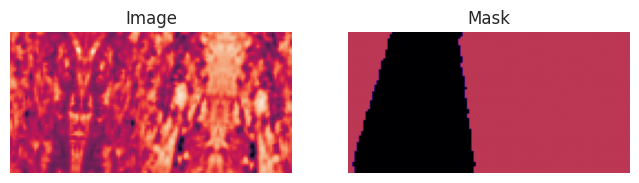

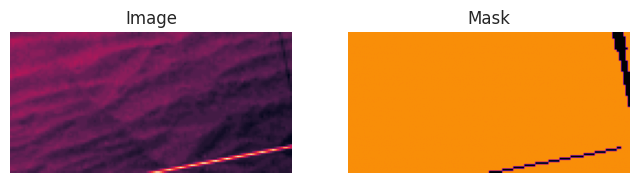

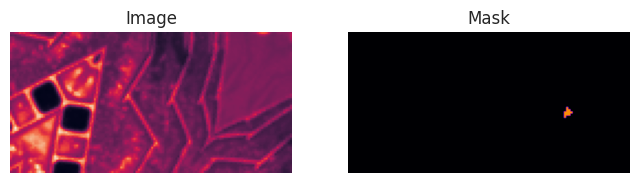

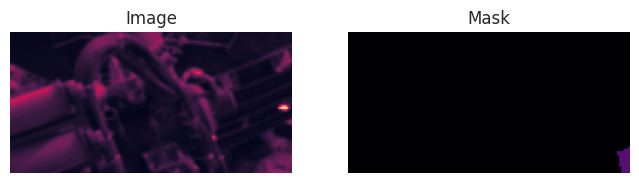

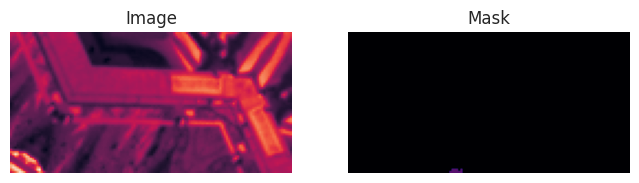

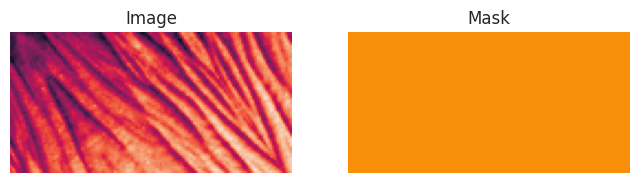

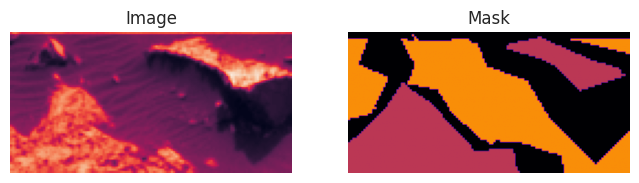

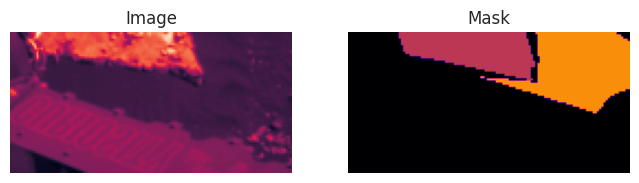

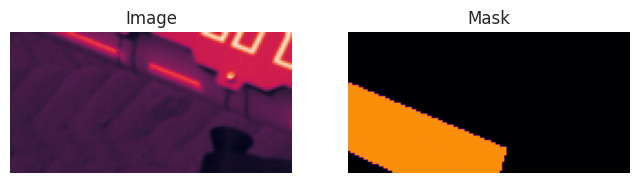

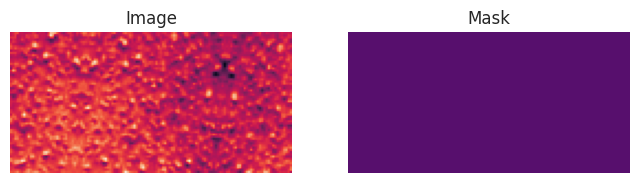

In [6]:
GeometricTrasform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Rotate(limit=(-180,180)),
])
img = []
masks = []

for i in range(X_train.shape[0]):
  transformed = GeometricTrasform(image=X_train[i], mask=y_train[i])
  #print(transformed['image'].shape)
  img.append(transformed['image'])
  masks.append(transformed['mask'])

X_train = np.array(img)
y_train = np.array(masks)

print(X_train.shape)
print(y_train.shape)

for i in range(10):
  plt.figure(figsize=(8,4))
  plt.subplot(1,2,1)
  plt.imshow(X_train[i])
  plt.axis('off')
  plt.title("Image")
  plt.subplot(1,2,2)
  plt.imshow(y_train[i], cmap='inferno', vmin=0, vmax=4)
  plt.axis('off')
  plt.title("Mask")
plt.show()

## 🔍 RANDOM CROP ON A SAMPLE Of 5000 IMAGES

In [7]:
randCrop = A.Compose([
    A.RandomResizedCrop(size=(64,128),scale=(0.9,1))
])

ToBeCropped = 5000
idx = np.random.choice(X_train.shape[0],ToBeCropped,replace=False)

for i in idx:
  transformed = randCrop(image=X_train[i], mask=y_train[i])
  img = transformed['image']
  mask = transformed['mask']

  X_train[i] = img
  y_train[i] = mask



print(X_train.shape)
print(y_train.shape)


(10020, 64, 128)
(10020, 64, 128)


## Save the dataset

In [ ]:
np.savez_compressed("Datasets/Dataset_cleaned_Augmented.npz", training_set=(X_train, y_train), test_set=X_test)